### 필요한 라이브러리 모델을 포함시킨다.

In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 데이터셋 로드

In [2]:
stock = pd.read_csv(r"https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/AAME.csv")
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [3]:
openValue = stock[['Open']]
openValue.head()

,Open
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### 특징값 정규화

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValue)

### 훈련 데이터와 테스트 데이터 분리하기
- 테스트 데이터는 후반 200개로 사용, 나머지는 훈련 데이터로 사용

In [5]:
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

### 순차 훈련 데이터 생성

In [9]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):        # 데이터의 길이만큼 반복
        train.append(data[i:i+window])       # i부저 (i+window-1) 까지를 저장
        target.append(data[i+window])        # i+window번째 요소는 정답
    return np.array(train), np.array(target) # 파이썬 리스트를 넘파이로 반환

X_train, y_train = make_sample(train_data, 30)
X_train.shape, y_train.shape

((9868, 30, 1), (9868, 1))

### LSTM 구축하기

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
         )
model.add(Dense(1))

### 모델 학습

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100

617/617 [==============================] - 4s 5ms/step - loss: 0.0030
Epoch 2/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 3/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 4/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 5/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 6/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 7/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 8/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 9/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 10/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 11/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0023
Epoch 12/100
617/617 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 13/100

### 테스트셋을 이용하여 미리 주가 예측

In [19]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


### 그래프 그리기

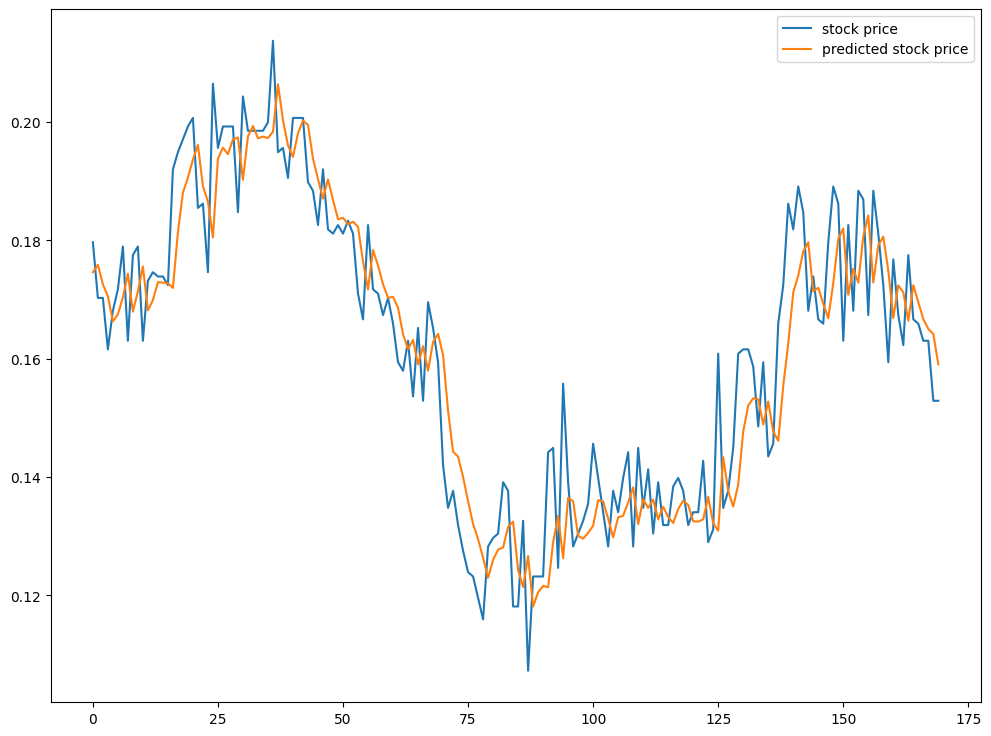

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()